In [1]:
#modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats

### Importing and visualizing dataframe

In [2]:
df=pd.read_csv("Ruter_data.csv", sep=";") #reading cvs table, columns separated by ";"
df.head() #visualizing table 

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


### Features: 
Område
Forsinket
Avgang
Antall passasjerer/Pasasjerer_Ombord
Måned
Ukedag

###### Feature engineering
Checked for and removed missing values
Created new features from existing features
Changed data types
Converted string to fit other functions
Removed outliers
Converted data into categorical data

### Checking for Na, Missing values and data type

No nan/null values found. Some values on Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra were unlogged values so i chose to remove the rows. 

In [3]:
#df.isna().sum() #checking for null and na values
df=df.drop(df[df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra==":"].index)  #removing all rows in dataframe with missing values for Faktisk_Ankomst

In [4]:
#checking datat type
#df.dtypes 

### Creating some features / Feature engenering 

#### Splitting "Dato" into day / month / year

In [5]:
df[["dag", "måned", "år"]]=df.Dato.str.split("/", expand=True) #splits Dato column into three columns day , month , year

#### Creating a feature "Avgang" 
       For using only the hour of Faktisk_Avgang and making it easier to categorise 

In [6]:
df["Avgang"]=df.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra.str.split(":").str[0];#isolating just the hour of the day removing minutes/seconds  
df.Avgang=pd.to_numeric(df.Avgang);  

#### Creating a feature "Forsinket"  and removing outliers for this feature

In [7]:
def conv(conv):                       #function for converting 24h and 25h to 00 and 01 
    dic={"24":"00", "25":"01"}
    for key, value in dic.items():
        conv=conv.replace(key, value)
    return conv
    
def time_d(time_d):                   #function for converting from string to datetime type
    return (datetime.datetime.strptime(time_d, "%H:%M:%S") - datetime.datetime(1900, 1, 1)).total_seconds()  #removing standard d/m/y and converting time to seconds
    
df["Planlagt_ankomst"]=df.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra.apply(conv).apply(time_d)  #applying both functions to the desired features
df["Faktisk_ankomst"]=df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra.apply(conv).apply(time_d)


df["Forsinket"]=(df.Planlagt_ankomst-df.Faktisk_ankomst)  #calculating difference between planed arrival and actual arrival


df = df[(df["Forsinket"] < df["Forsinket"].quantile(0.99)) & (df["Forsinket"] > df["Forsinket"].quantile(0.01))] #removing outliers


#### Creating a feature "antall_passasjerer"

In [8]:
df["antall_passasjerer"]=df.Kjøretøy_Kapasitet-df.Passasjerer_Ombord #feature antall_passasjerer assuming Passasjerer_Ombord substracted from Kjøretøy_Kapasitet equals number of passengers on bus

#### Creating a feature "Uke"

In [9]:
def uke(uke):                                                #Function for converting string to datetime type
    return datetime.datetime.strptime(uke,"%d/%m/%Y")

df['Ukedag'] = df.Dato.apply(uke).dt.day_name()              #Using function on Dato to create Ukedag and converting date to week name 

### Visualizing features 

[Text(0.5, 1.0, 'An')]

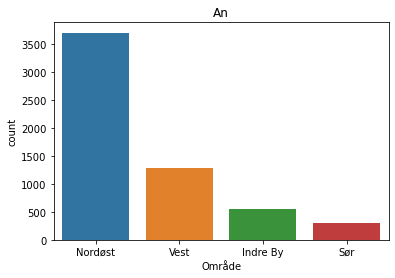

In [10]:
ax=sns.countplot(x='Område', data=df, order=df['Område'].value_counts().index)
ax.set(title="An")

D:\Install\Anaconda\envs\dave3625\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Forsinkelse i sekunder'),
 Text(0.5, 1.0, 'Forsinkelse per måned')]

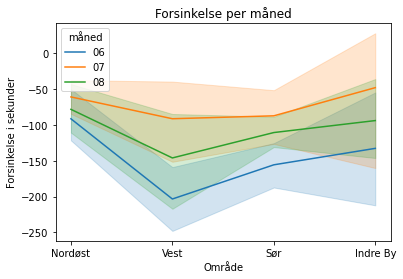

In [11]:
ax=sns.lineplot('Område', "Forsinket", data=df.groupby(['Kommune', "måned", "Område"]).mean(), hue="måned")
ax.set(ylabel="Forsinkelse i sekunder",title="Forsinkelse per måned")

[Text(0, 0.5, 'Antall avganger'), Text(0.5, 1.0, 'Antall avganger i timen')]

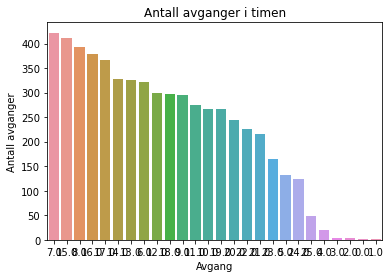

In [12]:
ax=sns.countplot(x='Avgang', data=df, order=df.Avgang.value_counts().index);  #plots most frequent avganger 
ax.set(ylabel="Antall avganger", title="Antall avganger i timen")

D:\Install\Anaconda\envs\dave3625\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Antall avganger'),
 Text(0.5, 1.0, 'Antall avganger i timen plot 2')]

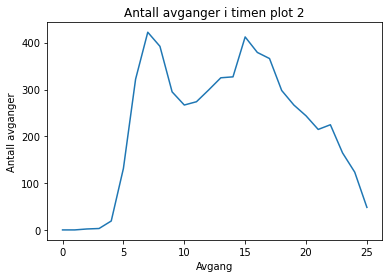

In [13]:
ax=sns.lineplot('Avgang', df.Avgang.value_counts(), data=df.groupby(["Avgang"]).mean())
ax.set(ylabel="Antall avganger",title="Antall avganger i timen plot 2")

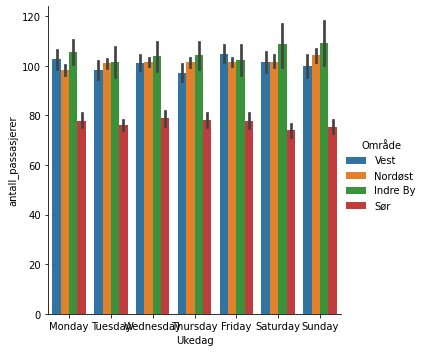

In [14]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.catplot(data=df, kind="bar", x="Ukedag", y="antall_passasjerer", hue="Område", order=order)